<a href="https://colab.research.google.com/github/RajaChowdhury/Credit-Card-Default-Prediction---Capstone-Project/blob/main/Credit_Card_Default_Prediction_Capstone_Project_Raja_Chowdhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,roc_auc_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,cross_val_score


# This will ignore all the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# # Mounting The Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install --upgrade xlrd # Installing xlrd for reading xls format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
# Reading the dataset
df = pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction- Capstone Project- Raja Chowdhury/Default Of Credit Card Clients.xls',header =1)

In [5]:
# Removing the limitations in viewing the total columns 
pd.set_option('max_columns',None)

In [6]:
# This will show you the values of first 5 rows
df.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# This will view the name of all columns
df.columns 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#This will show the type of each feature present in out dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Null Value Treatment

In [9]:
# Counting the null values
print(f'Total Number of Null Values: {df.isna().sum().sum()}')

Total Number of Null Values: 0


# Since there are no null values no null value treatment is required

In [10]:
#This returns the statistical summary of the dataframe or series.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Data Preprocessing

In [11]:
#Replacing the name from 0 to 1 in order to maintain the sequence 
df.rename(columns={'PAY_0':'PAY_1'},inplace=True) 

In [12]:
# Cleaning Education
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4

In [13]:
# Cleaning Marriage
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3

In [14]:
# Changing the name for better readability
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [15]:
# Creating Age Buckets Column for EDA
def age_buckets(x):
  if x>20 and x<=30:
    age='20-30'
  elif x>30 and x<=40:
    age= '31-40'
  elif x>40 and x<=50:
    age= '41-50'
  else:
    age= '60+'
  return age

df['age_buckets']=df['AGE'].apply(age_buckets)

### **Handling Outliers**

In [16]:
# Printing the number of rows and columns before outlier treatment
print('\033[1mBefore Outlier Treatment\033[0m')
print('Number of rows: {}\nNumber of columns:{}'.format(df.shape[0],df.shape[1]))

Before Outlier Treatment
Number of rows: 30000
Number of columns:26


In [17]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month', 'age_buckets'],
      dtype='object')

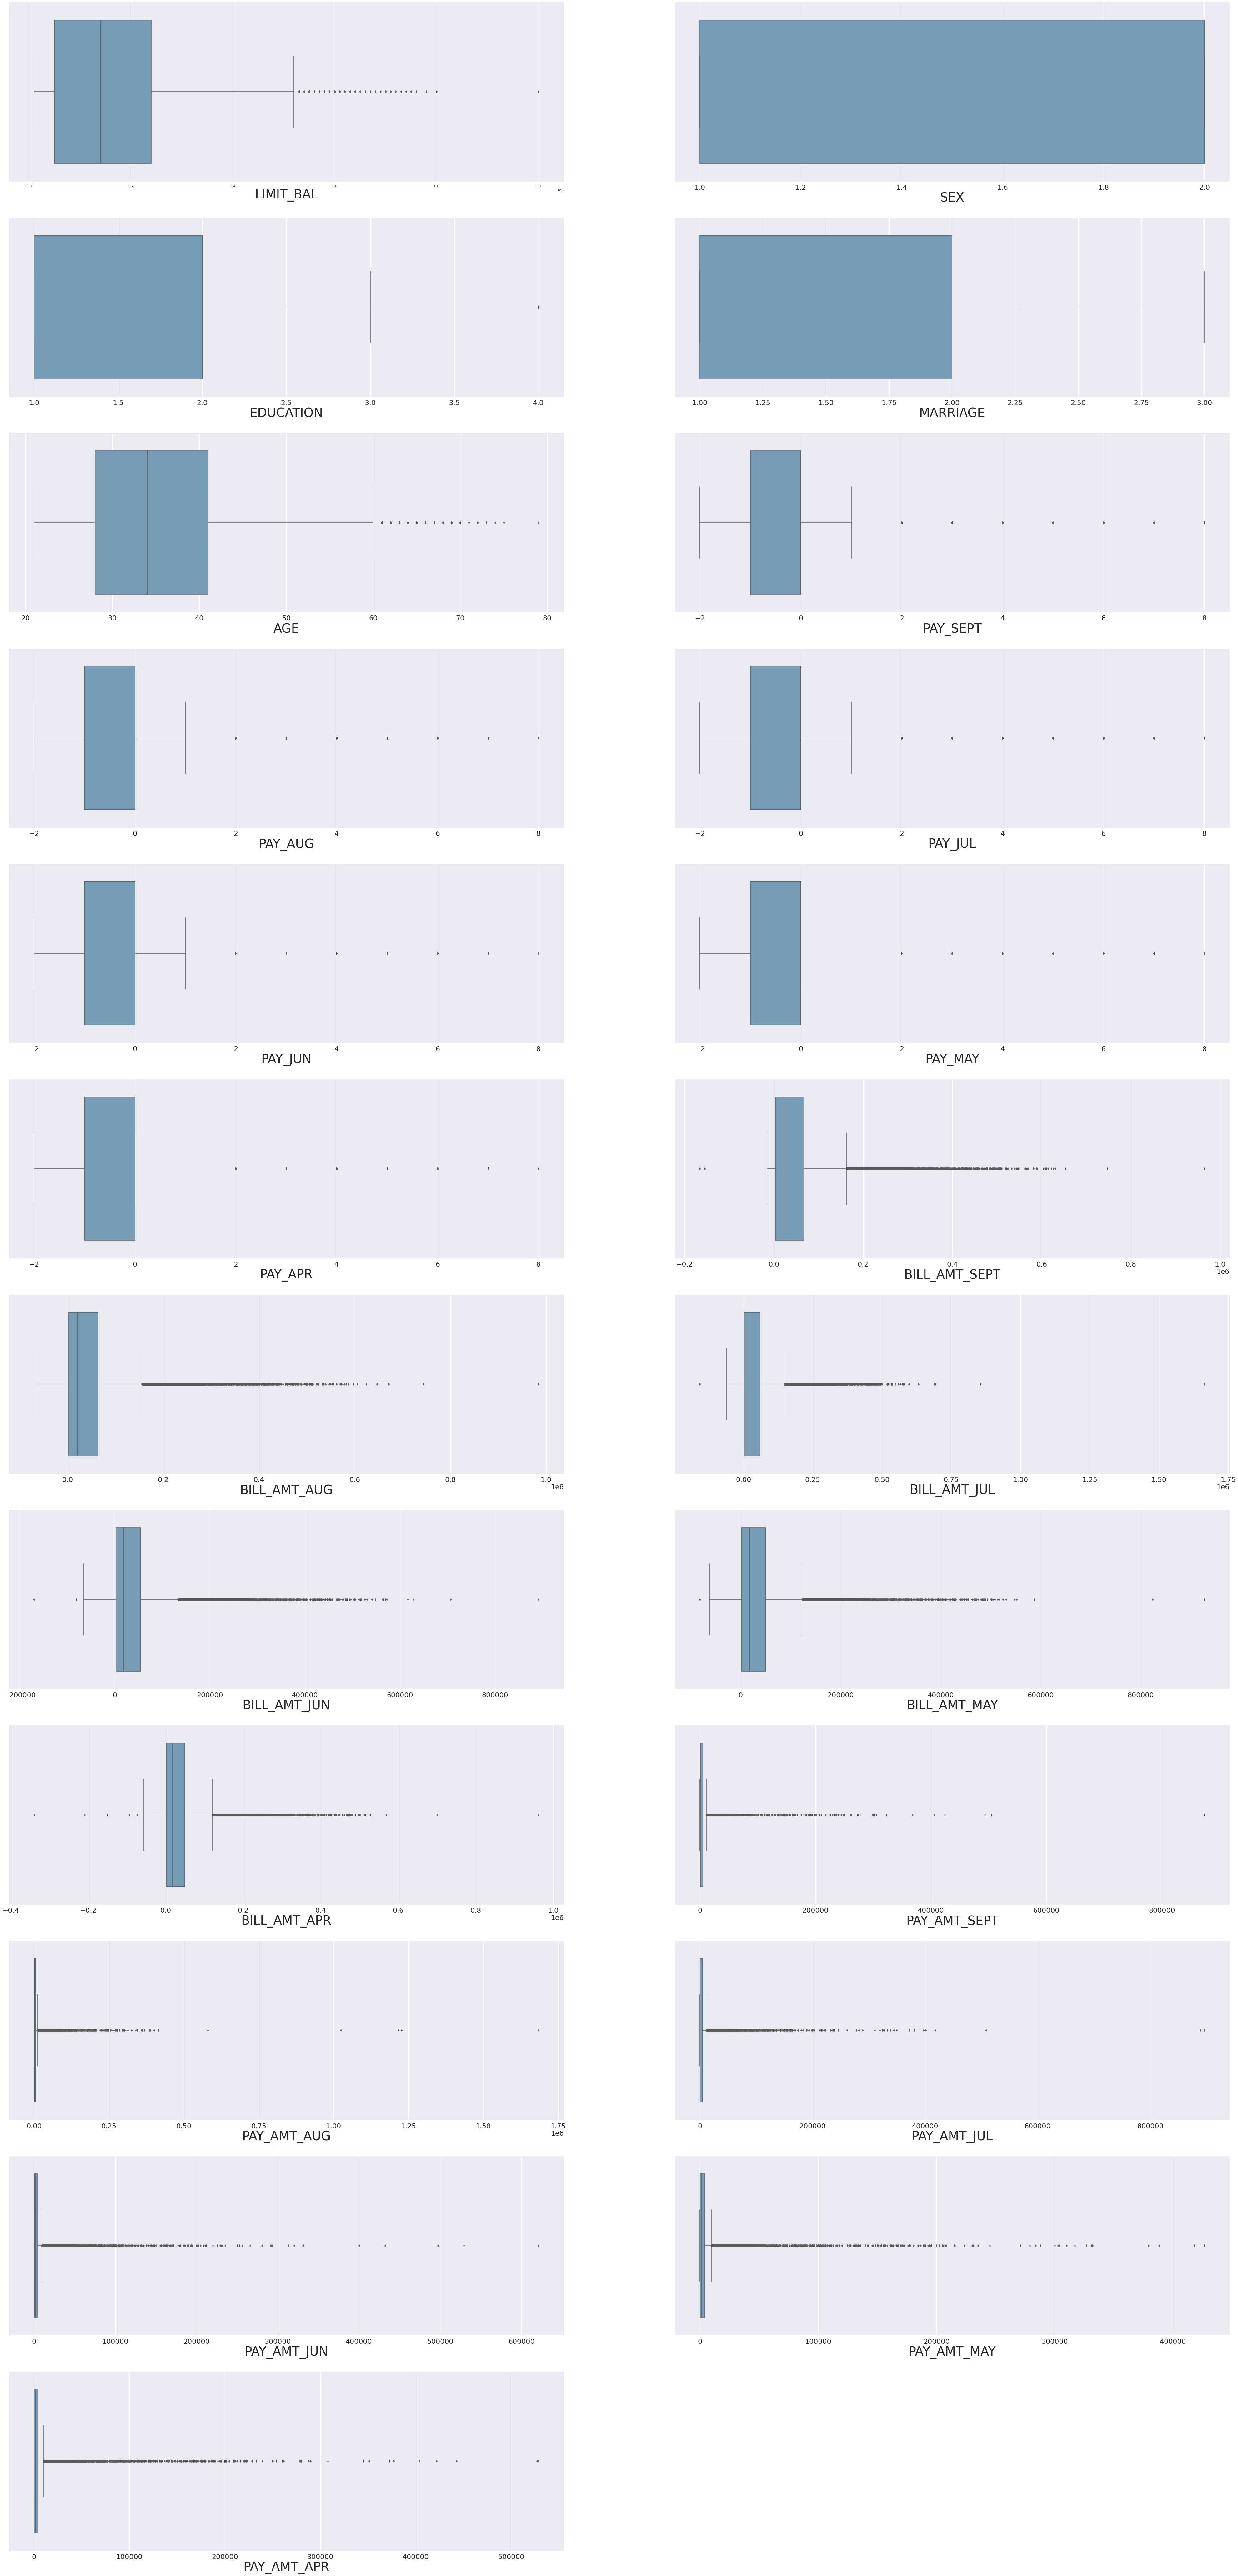

In [18]:
# Plotting Box plots to check outliers

lst_box = df[[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']]

# Box plot to detect outliers
plt.figure(figsize = (70,150))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(12, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(df[i[1]],color='#6C9DBF')
  plt.xlabel(i[1], fontsize=40)
sns.reset_orig()

In [19]:
# Treating Pay Columns
# Since 90 percent of our PAY data lies between -2 and 1 we will remove rest of the observations
df = df[(df.PAY_SEPT < 2) & (df.PAY_AUG < 2) & (df.PAY_JUL < 2) & (df.PAY_JUN < 2) & (df.PAY_MAY < 2)  & (df.PAY_MAY < 2) & (df.PAY_APR < 2)]

In [20]:
# Treating Limit Balance
# Removing outliers using z score method on Limit Balance column.
df['Z_LIMIT_BAL'] = np.abs(stats.zscore(df['LIMIT_BAL']))
df = df[(df['Z_LIMIT_BAL'] < 3)]
df.drop(['Z_LIMIT_BAL'],axis=1,inplace=True)

# Treating Age Column
df=df[(df.AGE)<61]

# Treating Education Column
df=df[(df.EDUCATION)<4]

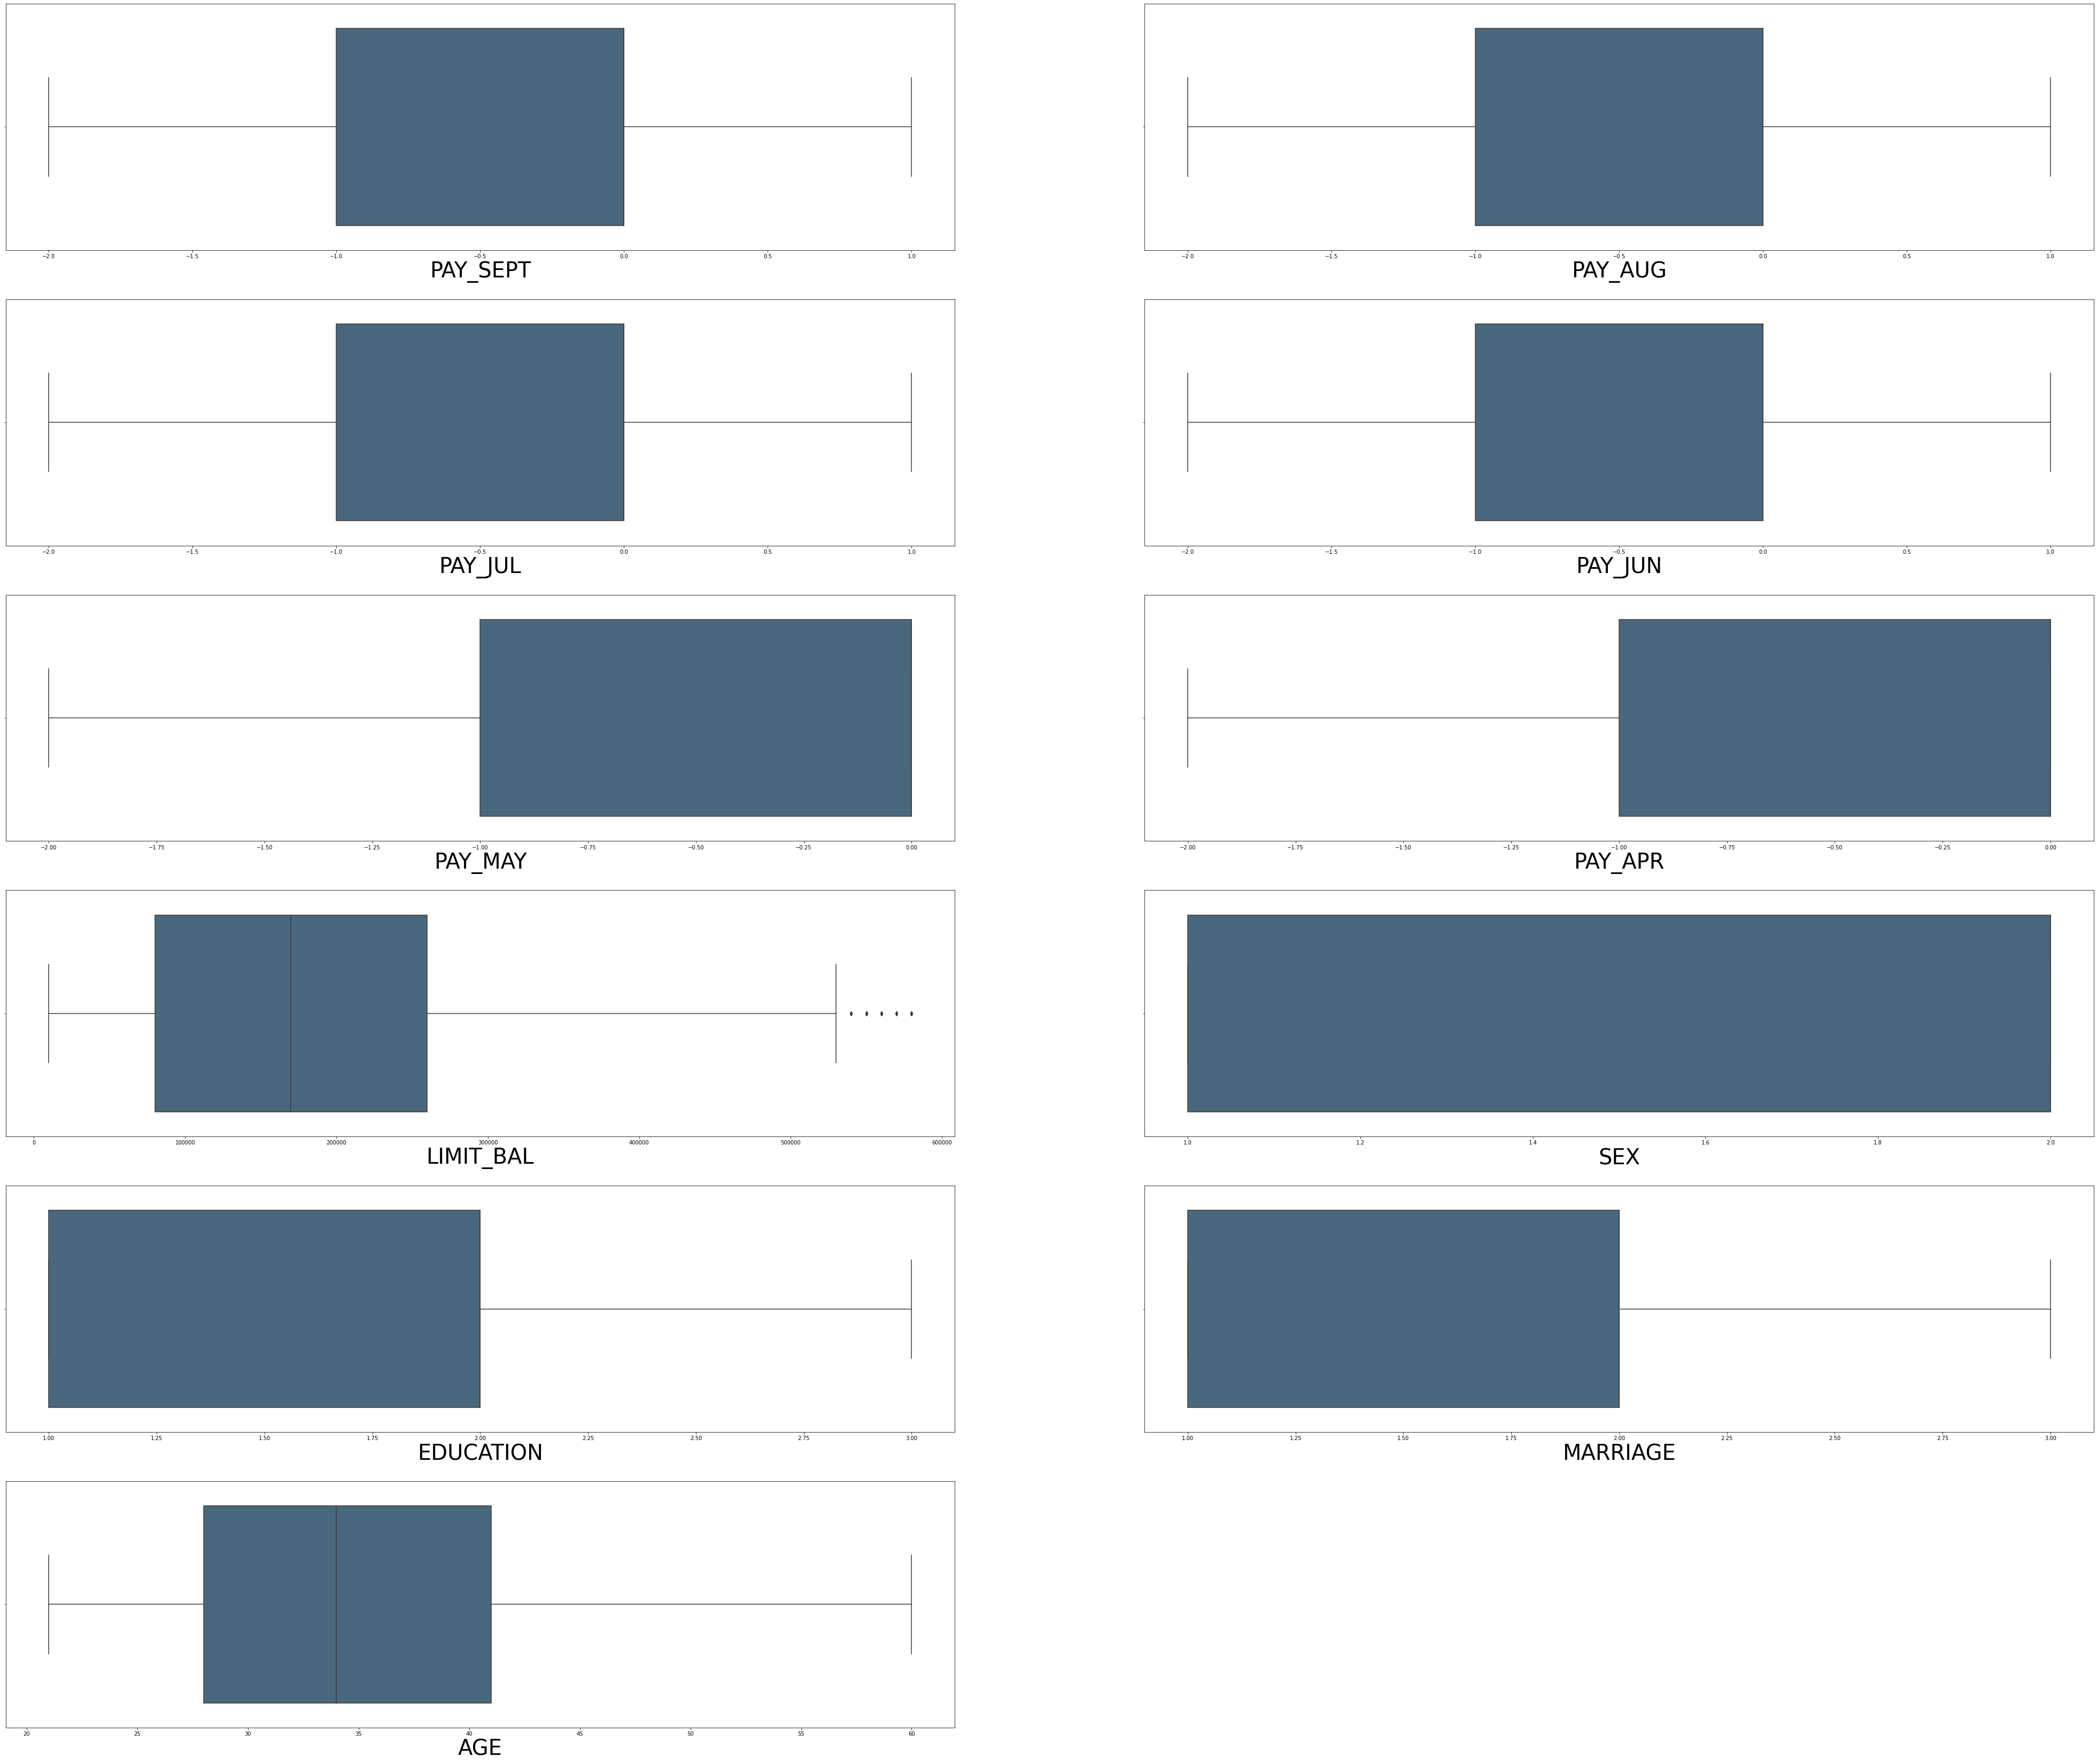

In [21]:
lst_box = df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']]
# Box plot to detect outliers
plt.figure(figsize = (70,100))
# sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
#   sns.set(font_scale = 2)
  sns.boxplot(df[i[1]], color= '#416986')
  plt.xlabel(i[1], fontsize=40)

sns.reset_orig()

In [22]:
# Since the box plot of BILL_AMT and PAY_AMT shows that most of the data belongs outside of 4th quartile removing outliers is not feasible 
# to remove outliers from them
print('\033[1mAfter Outlier Treatment\033[0m')
print('Number of rows   :{}\nNumber of columns:{}'.format(df.shape[0],df.shape[1]))

After Outlier Treatment
Number of rows   :20928
Number of columns:26


We have successfully tried to remove most outliers

## Exploratory Data Analysis

In [23]:
# Checking values in dependent variable
df['default payment next month'].value_counts()

0    18241
1     2687
Name: default payment next month, dtype: int64

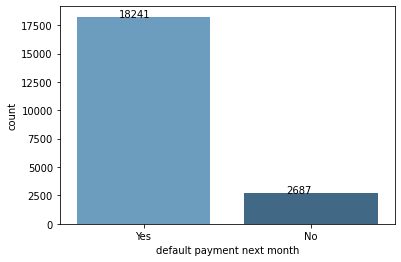

In [24]:
# Plotting values in dependent variable
ax=sns.countplot(df['default payment next month'],palette ='Blues_d')
plt.xticks(rotation=0,ticks=range(2),labels=['Yes','No'])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


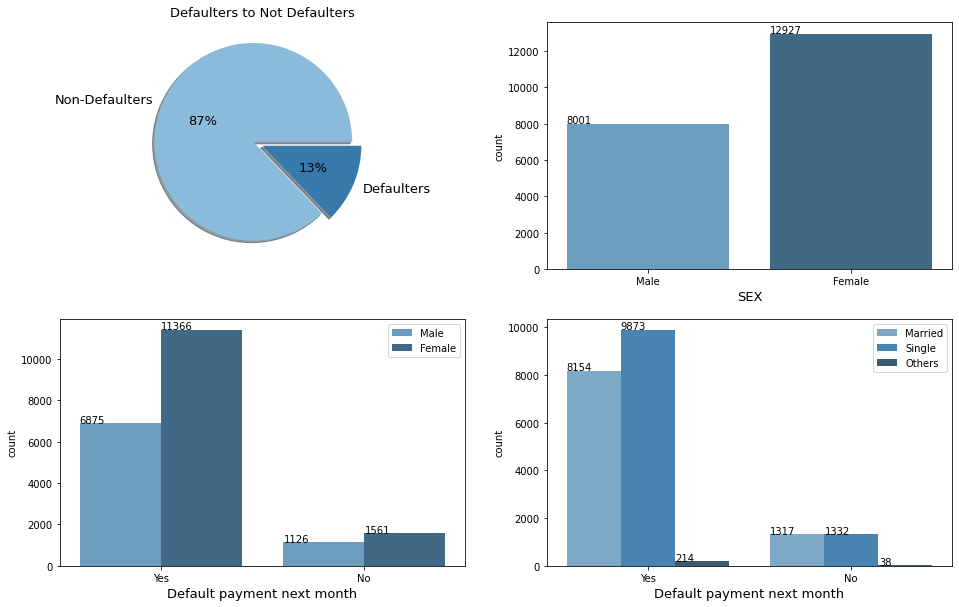

In [25]:
# Creating a subplots
plt.figure(figsize = (16,10))

# Subplot 1
plt.subplot(221)
plt.pie(df['default payment next month'].value_counts(),radius=1, autopct='%1.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['Non-Defaulters','Defaulters'],explode = [0.1, 0],
        shadow=True,colors=['#8ABBDB','#367AAB'])
plt.title('Defaulters to Not Defaulters',fontdict={'size':13})

# Subplot 2
plt.subplot(222)
ax=sns.countplot(df['SEX'],palette ='Blues_d')
plt.xticks(rotation=0,ticks=range(2),labels=['Male','Female'])
plt.xlabel('SEX',fontdict={'size':13})
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Subplot 3
plt.subplot(223)
ax=sns.countplot(df['default payment next month'],hue=df['SEX'],palette ='Blues_d')
plt.xticks(rotation=0,ticks=range(2),labels=['Yes','No'])
plt.legend(['Male','Female'])
plt.xlabel('Default payment next month',fontdict={'size':13})
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Subplot 4
plt.subplot(224)
ax=sns.countplot(df['default payment next month'],hue=df['MARRIAGE'],palette ='Blues_d')
plt.xticks(rotation=0,ticks=range(2),labels=['Yes','No'])
plt.legend(['Married','Single','Others'])
plt.xlabel('Default payment next month',fontdict={'size':13})
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

1. The number of people who will default their payment is much less than number of people of people who will pay on time


2. The Number of females are much more than males in our dataset (6,224) and we can also say that females tend to pay their default on time compared to their male counterparts


3. Married people are more likely to pay their default payments compared to singles and others 


4. We can also say that Singles do not pay their default payment marginally as compared to married counterparts

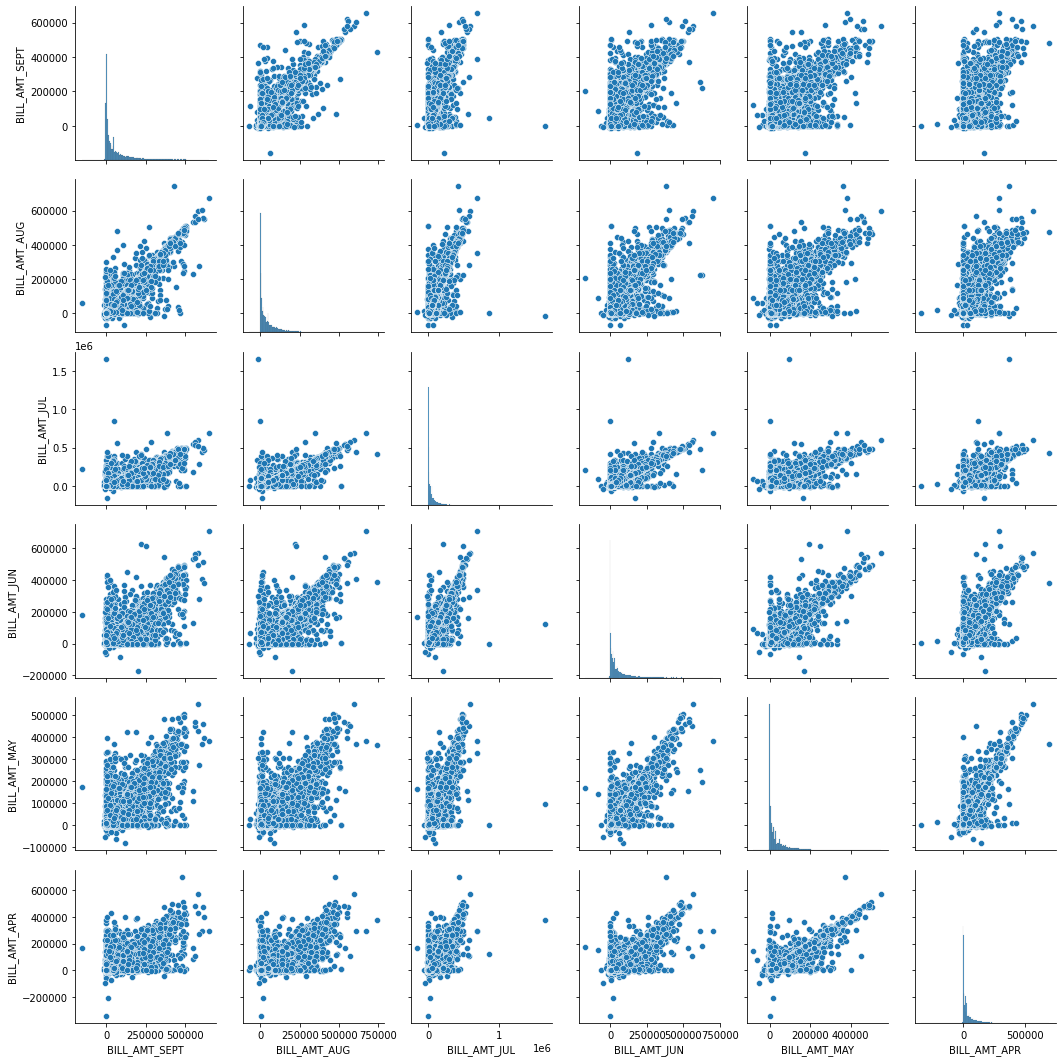

In [26]:
# Checking correlation between BILL_AMT Columns
sns.pairplot(data = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']])

Bill amount for each month is highly correlated with each other hence we will try to feature engineer bill amount to Dues column to reduce multicollinearity

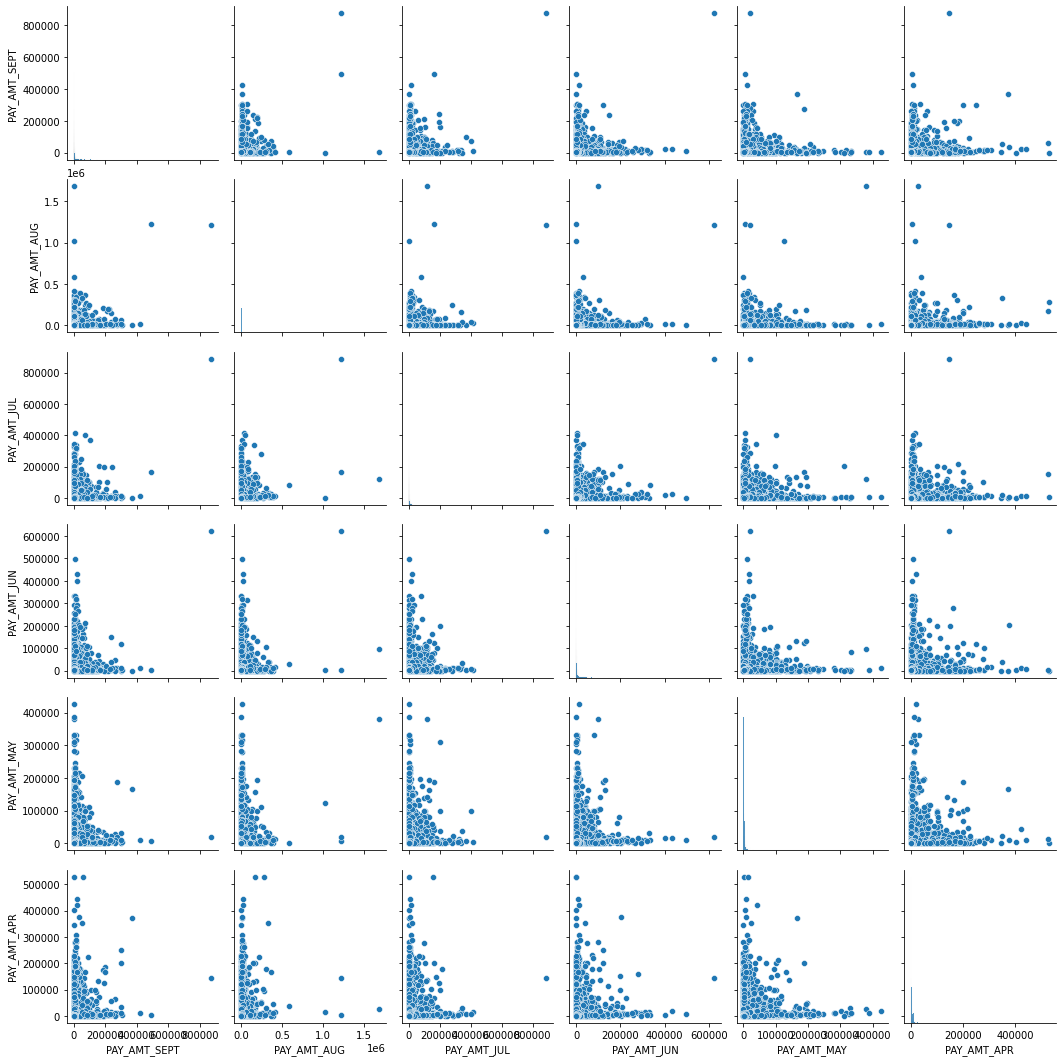

In [27]:
# Checking correlation between BILL_AMT Columns
sns.pairplot(data = df[[ 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']])

We can see that pay amount tends to clutter with each other hence we can feature engineer pay amount columns to one payment column to declutter our data

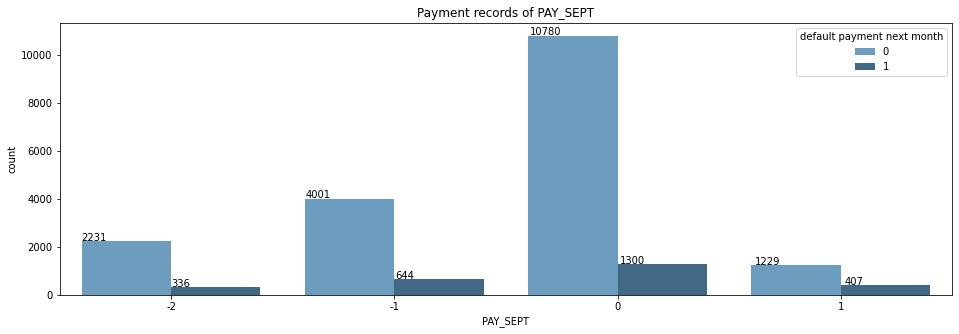

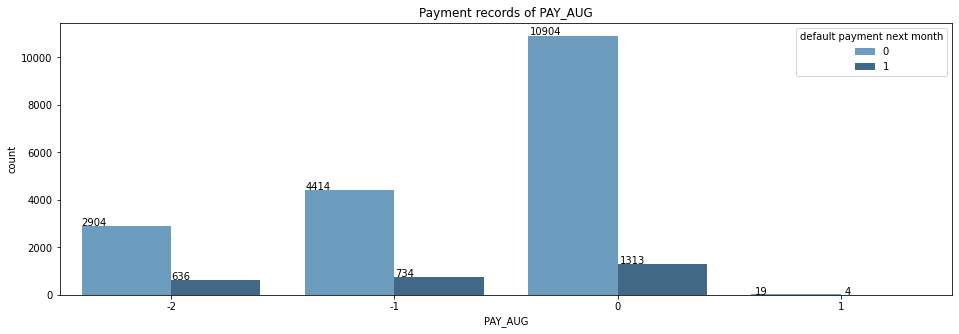

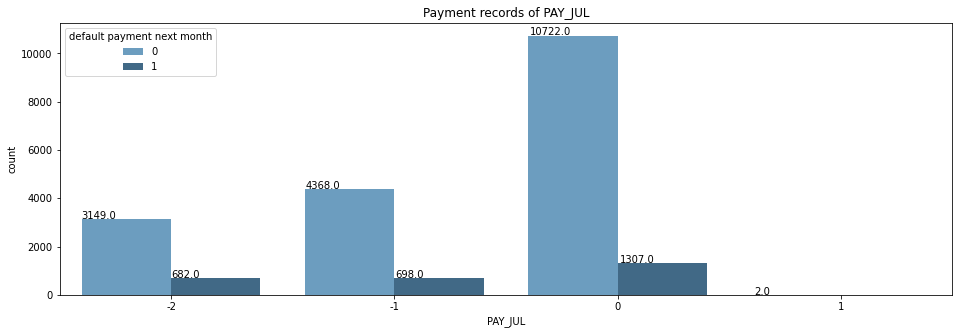

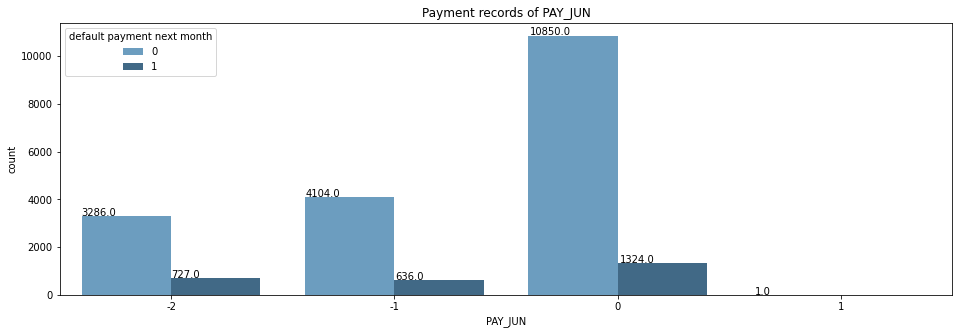

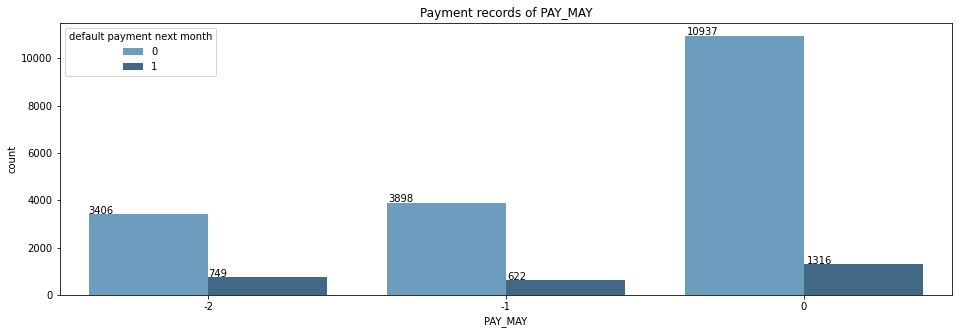

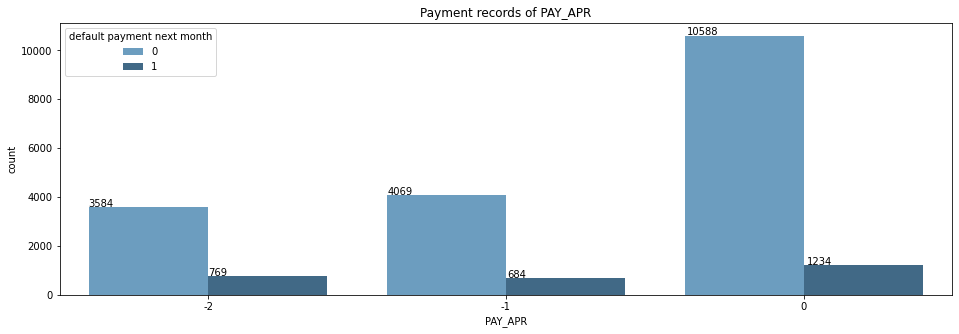

In [28]:
# Checking history of bill payment
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

for col in pay_col:
    plt.figure(figsize=(16,5))
    plt.title(f'Payment records of {col}')
    ax=sns.countplot(x = col, hue = 'default payment next month', data = df,palette ='Blues_d')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

From history of past payment it is clear that most people who pay duly are not likely to default their payment


Text(0.5, 0, 'Age in years')

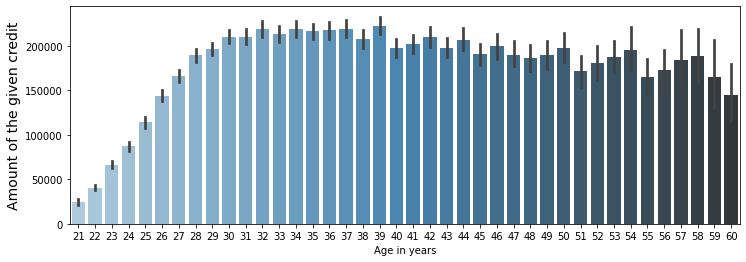

In [29]:
# Finding relation between Age and Limit balance
plt.figure(figsize=(12,4))
sns.barplot(df['AGE'],df['LIMIT_BAL'],palette ='Blues_d')
plt.ylabel('Amount of the given credit',fontdict={'fontsize':14})
plt.xlabel('Age in years')

Here, we can say from age 21 to 39 amount of the given credit is increasing however from 39 to 61 it started to decline and then from 62 to 79 it has increased drastically

# Key Findings from EDA

1. The number of people who will default their payment is much less than number of people of people who will pay on time


2. The Number of females are much more than males in our dataset (6,224) and we can also say that females tend to pay their default on time compared to their male counterparts


3. Married people are more likely to pay their default payments compared to singles and others 


4. We can also say that Singles do not pay their default payment marginally as compared to married counterparts


5. From pairplot 1 Bill amount for each month is highly correlated with each other hence we will try to feature engineer bill amount to Dues column to reduce multicollinearity


6. From pairplot 2 we can see that pay amount tends to clutter at one place hence we can try to feature engineer pay amount columns to one payment column to declutter our data


7. From history of past payment analysis it is clear that most people who pay duly are not likely to default their payment


8. Here, we can say from age 21 to 39 limit balance is increasing however from 39 to 61 it started to decline and then from 62 to 79 it has increased drastically

## Treating multicollinearity

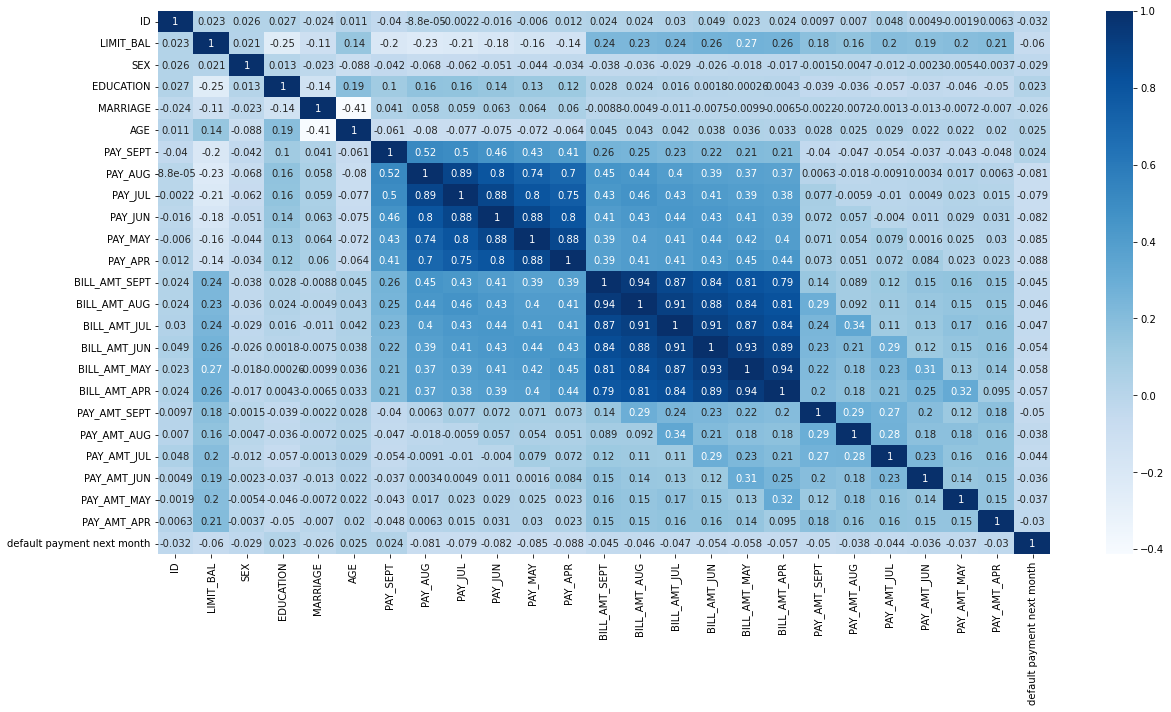

In [30]:
# Plotting correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap="Blues")

Feature Engineering

In [31]:
# Creating Payement_Value and Dues columns to treat multicollinearity
df_fr = df.copy()
df_fr['Payement_Value'] = df_fr['PAY_AMT_SEPT'] + df_fr['PAY_AMT_AUG'] + df_fr['PAY_AMT_JUL'] + df_fr['PAY_AMT_JUN'] + df_fr['PAY_AMT_MAY'] + df_fr['PAY_AMT_APR']

df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR'])

df_fr = df_fr.drop(['ID','BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR','age_buckets'],axis=1)

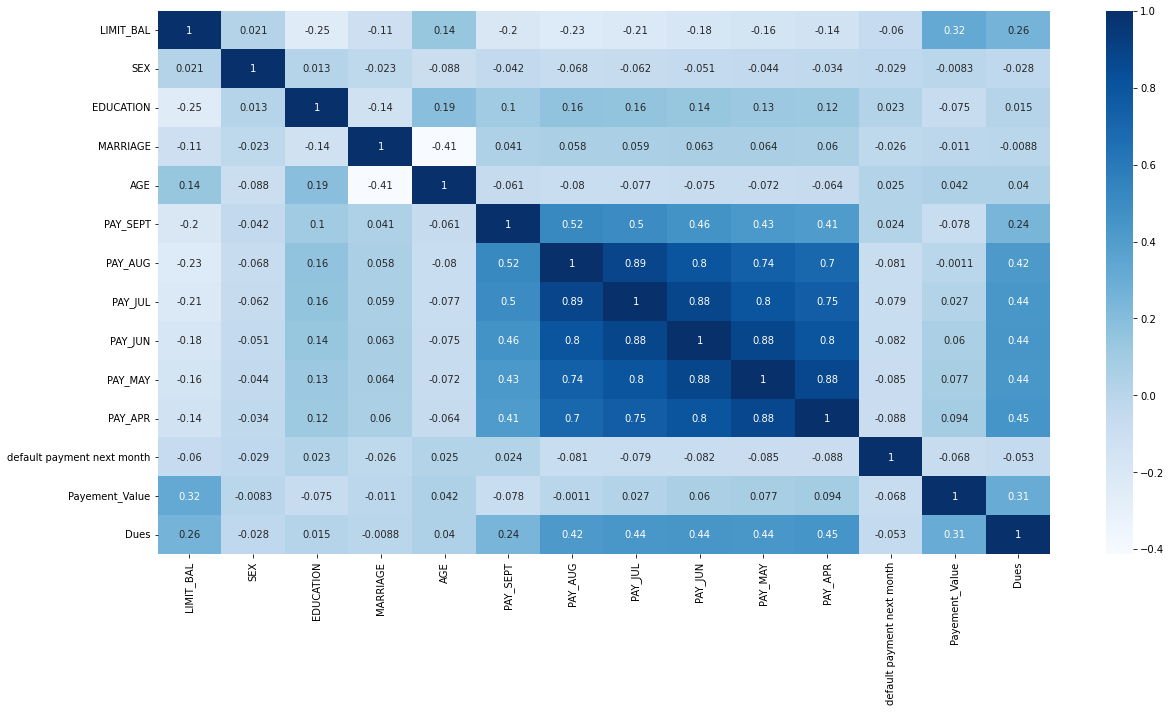

In [32]:
# Rechecking the heatmap to find if multicollinearity is reduced
plt.figure(figsize=(20,10))
sns.heatmap(df_fr.corr(),annot=True, cmap="Blues")

We have tried to treat most of the multi-collinearity using Feature Enginerring

## One Hot Encoding

In [33]:
# Encoding Education and Marriage since both are caategorical variables
df_fr = pd.get_dummies(columns = ['EDUCATION','MARRIAGE'], data = df_fr,drop_first=True)

In [34]:
# Checking results of previous execution
df_fr.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default payment next month,Payement_Value,Dues,EDUCATION_2,EDUCATION_3,MARRIAGE_2,MARRIAGE_3
2,90000,2,34,0,0,0,0,0,0,0,11018,82626,1,0,1,0
3,50000,2,37,0,0,0,0,0,0,0,8388,182101,1,0,0,0
4,50000,1,57,-1,0,-1,0,0,0,0,59049,102990,1,0,0,0
5,50000,1,37,0,0,0,0,0,0,0,7772,180245,0,0,1,0
6,500000,1,29,0,0,0,0,0,0,0,180759,2298802,0,0,1,0


Splitting the dataset

In [35]:
# Splitting the dataset into dependent and independent variables.Here x=dependent variables and y=dependent variables
x = df_fr.drop('default payment next month',axis=1)
y = df_fr['default payment next month']

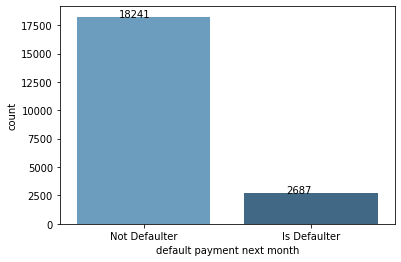

In [36]:
# Checking the Defaulter and non Defaulter counts for treatment of claass imbalance
ax=sns.countplot(y,palette ='Blues_d')
plt.xticks(rotation=0,ticks=range(2),labels=['Not Defaulter','Is Defaulter'])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Handling Data Imbalance

In [37]:
# Using Smote for handling data imbalance
SMOTE = SMOTE()
X_sm, Y_sm = SMOTE.fit_resample(x,y)

# summarize the new class distribution
Y_sm.value_counts()

0    18241
1    18241
Name: default payment next month, dtype: int64

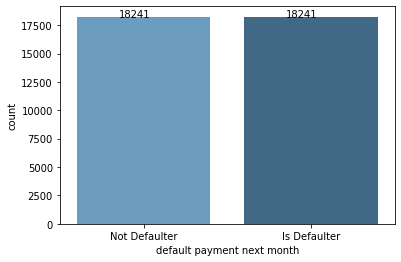

In [38]:
# Checking if SMOTE handles the class imbalance
ax=sns.countplot(Y_sm,palette ='Blues_d')
plt.xticks(rotation=0,ticks=range(2),labels=['Not Defaulter','Is Defaulter'])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


# Scaling

In [39]:
# Standard Scaler for scaling the data
scale = StandardScaler()
x_std = scale.fit_transform(X_sm)

# Train-Test Split

In [40]:
# Train-Test Split for splitting the dataset into training and validation sets
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_std,Y_sm,test_size=0.2)

# Implementing Models

## Logistic Regression

In [41]:
# Training Logistic Regression model
logistic = LogisticRegression(max_iter=200,random_state=42)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [42]:
# Predicting using our trained Logistic regression model
y_pred = logistic.predict(x_test)

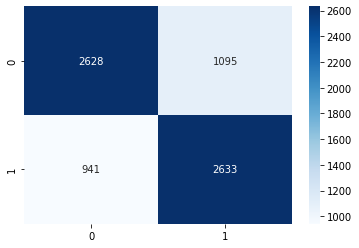

In [43]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [44]:
# Checking the classification metrics
log_prec=precision_score(y_pred,y_test)
log_rec=recall_score(y_pred,y_test)
log_acc=accuracy_score(y_pred,y_test)
log_f1=f1_score(y_pred,y_test)
log_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mLogistic Regression Classifier Model Metrics:\033[0m')
print(f"Precision Score: {log_prec}\nRecall Score: {log_rec}\nAccuracy Score: {log_acc}\nF1 Score: {log_f1}\nAUC-ROC score: {log_roc}")

Logistic Regression Classifier Model Metrics:
Precision Score: 0.7062768240343348
Recall Score: 0.7367095691102407
Accuracy Score: 0.720981225161025
F1 Score: 0.7211722815666941
AUC-ROC score: 0.7212959610257085


## Support Vector Classifier

In [45]:
# Training Support Vector Classifier Model
svc =SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [46]:
# Predicting using our trained Support Vector Classifier model
y_pred = svc.predict(x_test)

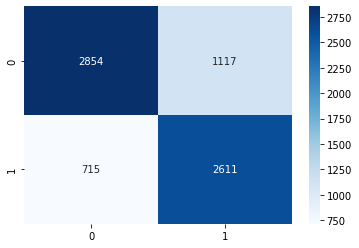

In [47]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [48]:
# Checking the classification metrics
svc_prec=precision_score(y_pred,y_test)
svc_rec=recall_score(y_pred,y_test)
svc_acc=accuracy_score(y_pred,y_test)
svc_f1=f1_score(y_pred,y_test)
svc_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mSupport Vector Classifier Model Metrics:\033[0m')
print(f"Precision Score: {svc_prec}\nRecall Score: {svc_rec}\nAccuracy Score: {svc_acc}\nF1 Score: {svc_f1}\nAUC-ROC score: {svc_roc}")

Support Vector Classifier Model Metrics:
Precision Score: 0.7003755364806867
Recall Score: 0.7850270595309682
Accuracy Score: 0.7489379196930245
F1 Score: 0.7402891976183726
AUC-ROC score: 0.7518688558798129


## Decision Tree Classifier

In [49]:
# Training Decision Tree Classifier Model
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Predicting using our trained Decision Tree Classifier model
y_pred = clf_tree.predict(x_test)

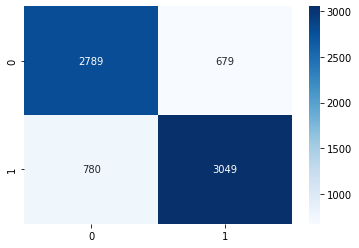

In [51]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [52]:
# Checking the classification metrics
dtc_prec=precision_score(y_pred,y_test)
dtc_rec=recall_score(y_pred,y_test)
dtc_acc=accuracy_score(y_pred,y_test)
dtc_f1=f1_score(y_pred,y_test)
dtc_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mDecision Tree Classifier Model Metrics:\033[0m')
print(f"Precision Score: {dtc_prec}\nRecall Score: {dtc_rec}\nAccuracy Score: {dtc_acc}\nF1 Score: {dtc_f1}\nAUC-ROC score: {dtc_roc}")

Decision Tree Classifier Model Metrics:
Precision Score: 0.8178648068669528
Recall Score: 0.796291459911204
Accuracy Score: 0.800054817048102
F1 Score: 0.806933968506021
AUC-ROC score: 0.8002506895865131


## Random Forest Classifier

In [53]:
# Training Random Forest Classifier Model
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Predicting using our trained Random Forest Classifier model
y_pred = forest.predict(x_test)

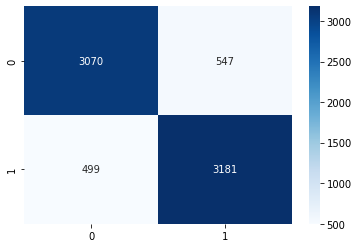

In [55]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [56]:
# Checking the classification metrics
rfc_prec=precision_score(y_pred,y_test)
rfc_rec=recall_score(y_pred,y_test)
rfc_acc=accuracy_score(y_pred,y_test)
rfc_f1=f1_score(y_pred,y_test)
rfc_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mRandom Forest Classifier Metrics:\033[0m')
print(f"Precision Score: {rfc_prec}\nRecall Score: {rfc_rec}\nAccuracy Score: {rfc_acc}\nF1 Score: {rfc_f1}\nAUC-ROC score: {rfc_roc}")

Random Forest Classifier Metrics:
Precision Score: 0.8532725321888412
Recall Score: 0.8644021739130435
Accuracy Score: 0.8566534192133753
F1 Score: 0.8588012958963285
AUC-ROC score: 0.8565859362791649


## XGBoost

In [57]:
# Training Linear Regression Model
xgb_clf=xgb.XGBClassifier(max_depth=5,learning_rate=0.3,n_jobs=-1,random_state=42)
xgb_clf.fit(x_train,y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_jobs=-1, random_state=42)

In [58]:
# Predicting using our trained Logistic regression model
y_pred = xgb_clf.predict(x_test)

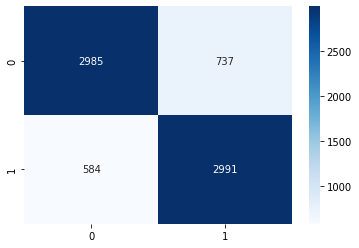

In [59]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [60]:
# Checking the classification metrics
xgb_prec=precision_score(y_pred,y_test)
xgb_rec=recall_score(y_pred,y_test)
xgb_acc=accuracy_score(y_pred,y_test)
xgb_f1=f1_score(y_pred,y_test)
xgb_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mXGboost Model Metrics:\033[0m')
print(f"Precision Score: {xgb_prec}\nRecall Score: {xgb_rec}\nAccuracy Score: {xgb_acc}\nF1 Score: {xgb_f1}\nAUC-ROC score: {xgb_roc}")

XGboost Model Metrics:
Precision Score: 0.8023068669527897
Recall Score: 0.8366433566433567
Accuracy Score: 0.8189666986432781
F1 Score: 0.8191154320142408
AUC-ROC score: 0.8193157675210335


# HyperParameter Tuning

In [61]:
# Initializing paramter grid for GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet','none'],'C':list(np.linspace(0,1,11)),'max_iter':list(range(50,500,50))}

# Defining object for GridSearchCV
logistic_GCV = LogisticRegression(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
logistic_GCV=GridSearchCV(logistic_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
logistic_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0],
                         'max_iter': [50, 100, 150, 200, 250, 300, 350, 400,
                                      450],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='precision', verbose=10)

In [62]:
# Predicting Using GridSearchCV
y_pred = logistic_GCV.predict(x_test)

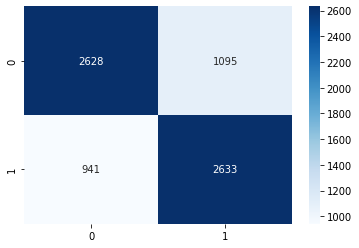

In [63]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [64]:
# Printing the metrics for GridSearchCV
log_prec_gcv=precision_score(y_pred,y_test)
log_rec_gcv=recall_score(y_pred,y_test)
log_acc_gcv=accuracy_score(y_pred,y_test)
log_f1_gcv=f1_score(y_pred,y_test)
log_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Logistic Regression according to GCV:\033[0m',logistic_GCV.best_params_)
print('\033[1mTuned Logistic Regression Model Metrics:\033[0m')
print(f"Precision Score: {log_prec_gcv}\nRecall Score: {log_rec_gcv}\nAccuracy Score: {log_acc_gcv}\nF1 Score: {log_f1_gcv}\nAUC-ROC score: {log_roc_gcv}")

Best Parameters for Logistic Regression according to GCV: {'C': 0.30000000000000004, 'max_iter': 50, 'penalty': 'l2'}
Tuned Logistic Regression Model Metrics:
Precision Score: 0.7062768240343348
Recall Score: 0.7367095691102407
Accuracy Score: 0.720981225161025
F1 Score: 0.7211722815666941
AUC-ROC score: 0.7212959610257085


## Support Vector Classifier

In [65]:
# Initializing paramter grid for GridSearchCV
parameters = {'C':list(np.linspace(0,1,11))}

# Defining object for GridSearchCV
SVC_GCV = SVC(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
SVC_GCV=GridSearchCV(SVC_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
SVC_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0]},
             scoring='precision', verbose=10)

In [66]:
# Predicting Using GridSearchCV
y_pred = SVC_GCV.predict(x_test)

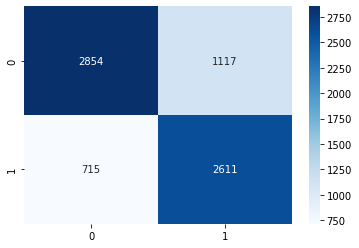

In [67]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [68]:
# Checking the classification metrics
svc_prec_gcv=precision_score(y_pred,y_test)
svc_rec_gcv=recall_score(y_pred,y_test)
svc_acc_gcv=accuracy_score(y_pred,y_test)
svc_f1_gcv=f1_score(y_pred,y_test)
svc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Support Vector Classifier according to GCV:\033[0m',SVC_GCV.best_params_)
print('\033[1mSupport Vector Classifier Model Metrics:\033[0m')
print(f"Precision Score: {svc_prec_gcv}\nRecall Score: {svc_rec_gcv}\nAccuracy Score: {svc_acc_gcv}\nF1 Score: {svc_f1_gcv}\nAUC-ROC score: {svc_roc_gcv}")

Best Parameters for Support Vector Classifier according to GCV: {'C': 1.0}
Support Vector Classifier Model Metrics:
Precision Score: 0.7003755364806867
Recall Score: 0.7850270595309682
Accuracy Score: 0.7489379196930245
F1 Score: 0.7402891976183726
AUC-ROC score: 0.7518688558798129


## Decision Tree Classifier

In [69]:
# Initializing paramter grid for GridSearchCV
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}

# Defining object for GridSearchCV
dtc_GCV = DecisionTreeClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
dtc_GCV=GridSearchCV(dtc_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
dtc_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring='precision', verbose=10)

In [70]:
# Predicting Using GridSearchCV
y_pred = dtc_GCV.predict(x_test)

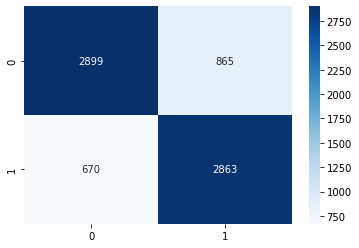

In [71]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [72]:
# Checking the classification metrics
dtc_prec_gcv=precision_score(y_pred,y_test)
dtc_rec_gcv=recall_score(y_pred,y_test)
dtc_acc_gcv=accuracy_score(y_pred,y_test)
dtc_f1_gcv=f1_score(y_pred,y_test)
dtc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Decision Tree Classifier according to GCV:\033[0m',dtc_GCV.best_params_)
print('\033[1mDecision Tree Classifier Model Metrics:\033[0m')
print(f"Precision Score: {dtc_prec_gcv}\nRecall Score: {dtc_rec_gcv}\nAccuracy Score: {dtc_acc_gcv}\nF1 Score: {dtc_f1_gcv}\nAUC-ROC score: {dtc_roc_gcv}")

Best Parameters for Decision Tree Classifier according to GCV: {'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Classifier Model Metrics:
Precision Score: 0.7679721030042919
Recall Score: 0.8103594678743278
Accuracy Score: 0.7896395779087296
F1 Score: 0.7885966120369096
AUC-ROC score: 0.7902753768702139


## Random Forest Classifier

In [73]:
# Initializing paramter grid for GridSearchCV
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}

# Defining object for GridSearchCV
rfc_GCV = RandomForestClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
rfc_GCV=GridSearchCV(rfc_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
rfc_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring='precision', verbose=10)

In [74]:
# Predicting Using GridSearchCV
y_pred = rfc_GCV.predict(x_test)

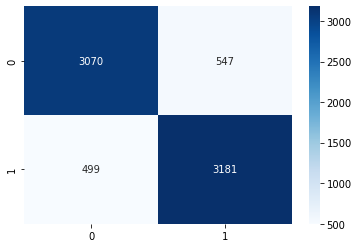

In [75]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [76]:
# Checking the classification metrics
rfc_prec_gcv=precision_score(y_pred,y_test)
rfc_rec_gcv=recall_score(y_pred,y_test)
rfc_acc_gcv=accuracy_score(y_pred,y_test)
rfc_f1_gcv=f1_score(y_pred,y_test)
rfc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Decision Tree Classifier according to GCV:\033[0m',dtc_GCV.best_params_)
print('\033[1mRandom Forest Classifier Model Metrics:\033[0m')
print(f"Precision Score: {rfc_prec_gcv}\nRecall Score: {rfc_rec_gcv}\nAccuracy Score: {rfc_acc_gcv}\nF1 Score: {rfc_f1_gcv}\nAUC-ROC score: {rfc_roc_gcv}")

Best Parameters for Decision Tree Classifier according to GCV: {'min_samples_leaf': 2, 'min_samples_split': 2}
Random Forest Classifier Model Metrics:
Precision Score: 0.8532725321888412
Recall Score: 0.8644021739130435
Accuracy Score: 0.8566534192133753
F1 Score: 0.8588012958963285
AUC-ROC score: 0.8565859362791649


## XGBoost

In [77]:
# Initializing paramter grid for GridSearchCV
parameters = {'learning_rate':list(np.linspace(0,1,11))}

# Defining object for GridSearchCV
xgb_GCV = xgb.XGBClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
xgb_GCV=GridSearchCV(xgb_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
xgb_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.0, 0.1, 0.2, 0.30000000000000004,
                                           0.4, 0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0]},
             scoring='precision', verbose=10)

In [78]:
# Predicting Using GridSearchCV
y_pred = xgb_GCV.predict(x_test)

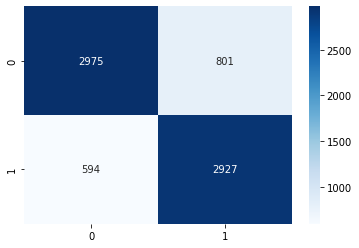

In [79]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [80]:
# Checking the classification metrics
xgb_prec_gcv=precision_score(y_pred,y_test)
xgb_rec_gcv=recall_score(y_pred,y_test)
xgb_acc_gcv=accuracy_score(y_pred,y_test)
xgb_f1_gcv=f1_score(y_pred,y_test)
xgb_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for XGBoost Classifier according to GCV:\033[0m',xgb_GCV.best_params_)
print('\033[1mXGBoost Classifier Model Metrics:\033[0m')
print(f"Precision Score: {xgb_prec_gcv}\nRecall Score: {xgb_rec_gcv}\nAccuracy Score: {xgb_acc_gcv}\nF1 Score: {xgb_f1_gcv}\nAUC-ROC score: {xgb_roc_gcv}")

Best Parameters for XGBoost Classifier according to GCV: {'learning_rate': 0.9}
XGBoost Classifier Model Metrics:
Precision Score: 0.7851394849785408
Recall Score: 0.8312979267253621
Accuracy Score: 0.8088255447444155
F1 Score: 0.8075596634018485
AUC-ROC score: 0.8095843447186133


# Plotting Classification Metrics

In [85]:
# Creating Lists for Un-tuned Models for Plotting

precision,recall,accuracy,f1,roc=[],[],[],[],[]
precision.extend([log_prec,svc_prec,dtc_prec,rfc_prec,xgb_prec])
recall.extend([log_rec,svc_rec,dtc_rec,rfc_rec,xgb_rec])
accuracy.extend([log_acc,svc_acc,dtc_acc,rfc_acc,xgb_acc])
f1.extend([log_f1,svc_f1,dtc_f1,rfc_f1,xgb_f1])
roc.extend([log_roc,svc_roc,dtc_roc,rfc_roc,xgb_roc])
precision=[int(i*100) for i in precision]
recall=[int(i*100) for i in recall]
accuracy=[int(i*100) for i in accuracy]
f1=[int(i*100) for i in f1]
roc=[int(i*100) for i in roc]

In [86]:
# Creating Lists for Tuned Models for Plotting
precision_gcv,recall_gcv,accuracy_gcv,f1_gcv,roc_gcv=[],[],[],[],[]
precision_gcv.extend([log_prec_gcv,svc_prec_gcv,dtc_prec_gcv,rfc_prec_gcv,xgb_prec_gcv])
recall_gcv.extend([log_rec_gcv,svc_rec_gcv,dtc_rec_gcv,rfc_rec_gcv,xgb_rec_gcv])
accuracy_gcv.extend([log_acc_gcv,svc_acc_gcv,dtc_acc_gcv,rfc_acc_gcv,xgb_acc_gcv])
f1_gcv.extend([log_f1_gcv,svc_f1_gcv,dtc_f1_gcv,rfc_f1_gcv,xgb_f1_gcv])
roc_gcv.extend([log_roc_gcv,svc_roc_gcv,dtc_roc_gcv,rfc_roc_gcv,xgb_roc_gcv])
precision_gcv=[int(i*100) for i in precision_gcv]
recall_gcv=[int(i*100) for i in recall_gcv]
accuracy_gcv=[int(i*100) for i in accuracy_gcv]
f1_gcv=[int(i*100) for i in f1_gcv]
roc_gcv=[int(i*100) for i in roc_gcv]

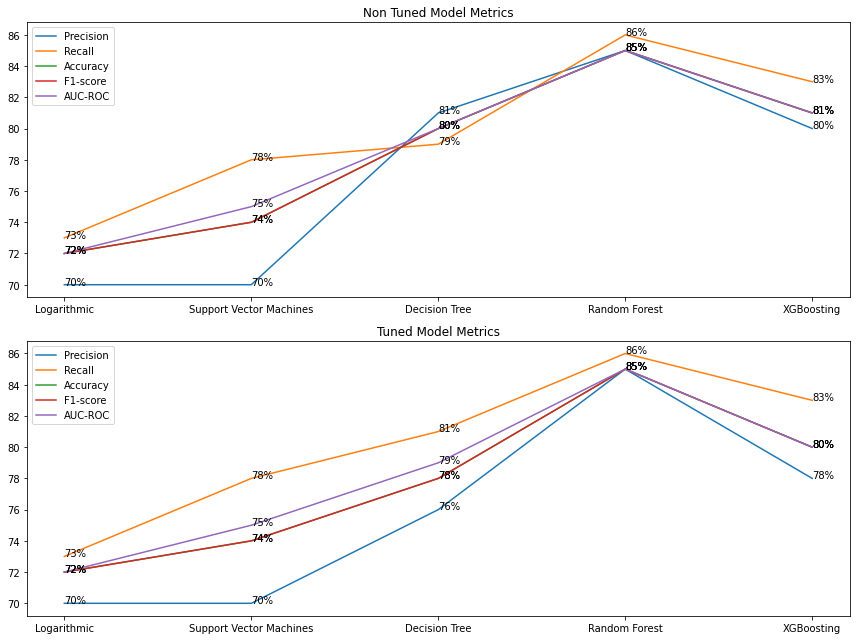

In [87]:
# Plotting the data from Above Executions
x=['Logarithmic','Support Vector Machines','Decision Tree','Random Forest','XGBoosting']
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
for i in [precision,recall,accuracy,f1,roc]:
    plt.plot(x,i)
    for a,b in zip(x,i):
        plt.text(a,b,str(b)+'%')
plt.legend(['Precision','Recall','Accuracy','F1-score','AUC-ROC'])
plt.title('Non Tuned Model Metrics')

plt.subplot(2,1,2)
for i in [precision_gcv,recall_gcv,accuracy_gcv,f1_gcv,roc_gcv]:
    plt.plot(x,i)
    for a,b in zip(x,i):
        plt.text(a,b,str(b)+'%')
plt.legend(['Precision','Recall','Accuracy','F1-score','AUC-ROC'])
plt.title('Tuned Model Metrics')
plt.tight_layout()

# Feature Importance

AttributeError: ignored

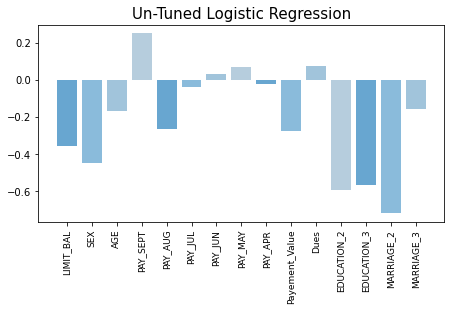

In [88]:
# Plotting Feature Importance of Un-Tuned Models

# Adding Labels to the graphs
def addlabels(x,y):              
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontdict={'fontsize':8})
        
# Retriving columns for plotting
x = df_fr.drop('default payment next month',axis=1)[:0]

# Plotting the Graphs
plt.figure(figsize=(16,8))
for i,j in enumerate([logistic,clf_tree,forest,xgb_clf]):
    plt.subplot(2,2,i+1)
    model=j
    if j==logistic:
        importance=model.coef_[0]
        plt.title('Un-Tuned Logistic Regression',fontsize=15)
    else:
        importance=model.feature_importances_
        if j==clf_tree:
            plt.title('Un-Tuned Decision Tree Model',fontsize=15)
        elif j==forest:
            plt.title('Un-Tuned Random Forest Model',fontsize=15)
        elif j==xgb_clf:
            plt.title('Un-Tuned XGBoost Model',fontsize=15)       
    plt.bar(range(len(importance)),importance,color=['#68A6D0','#8ABBDB','#A1C4DB','#B6CDDD'])
    plt.xticks(ticks=range(0,len(x.columns)),labels=x.columns,rotation=90,fontdict={'fontsize':9})
    addlabels(x.columns, [round(i,3) for i in importance])

plt.subplots_adjust(wspace=0.1,hspace=0.8)
plt.suptitle('Feature Importance of Un-Tuned Models',fontsize=25)

AttributeError: ignored

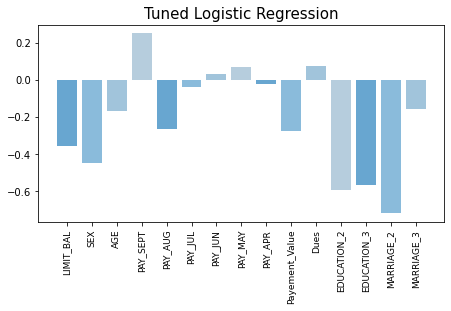

In [89]:
# Plotting Feature Importance of Un-Tuned Models

# Adding Labels to the graphs
def addlabels(x,y):              
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontdict={'fontsize':8})
# Plotting the Graphs
plt.figure(figsize=(16,8))
for i,j in enumerate([logistic_GCV,dtc_GCV,rfc_GCV,xgb_GCV]):
    plt.subplot(2,2,i+1)
    model=j.best_estimator_
    if j==logistic_GCV:
        importance=model.coef_[0]
        plt.title('Tuned Logistic Regression',fontsize=15)
    else:
        importance=model.feature_importances_
        if j==dtc_GCV:
            plt.title('Tuned Decision Tree Model',fontsize=15)
        elif j==rfc_GCV:
            plt.title('Tuned Random Forest Model',fontsize=15)
        elif j==xgb_GCV:
            plt.title('Tuned XGBoost Model',fontsize=15)       
    plt.bar(range(len(importance)),importance,color=['#68A6D0','#8ABBDB','#A1C4DB','#B6CDDD'])
    plt.xticks(ticks=range(0,len(x.columns)),labels=x.columns,rotation=90,fontdict={'fontsize':9})
    addlabels(x.columns, [round(i,3) for i in importance])

plt.subplots_adjust(wspace=0.1,hspace=0.8)
plt.suptitle('Feature Importance of Tuned Models',fontsize=25)

# Model Performance of our best Model

In [90]:
cv_results=cross_validate(rfc_GCV.best_estimator_,x_train,y_train,scoring='accuracy',cv=3,n_jobs=-1)
print(cv_results)

{'fit_time': array([3.6447866 , 3.60622692, 2.41705751]), 'score_time': array([0.34124351, 0.32253098, 0.24409723]), 'test_score': array([0.83646829, 0.83254523, 0.8358347 ])}


In [91]:
print('''\033[1mThe Performance of our best model :{}
with GridSearch parameters: {}
according to cross validate method of sklearn:\033[0m'''.format(rfc_GCV.best_estimator_,rfc_GCV.best_params_))
print('The average time for fitting the estimator on the train set is {}'.format(round((cv_results['fit_time'].sum())/len(cv_results['fit_time']),5)))
print('The average time for scoring the estimator on the test set is {}'.format(round((cv_results['score_time'].sum())/len(cv_results['score_time']),5)))
print('The average Accuracy for Estimator is {}'.format(round((cv_results['test_score'].sum())/len(cv_results['test_score']),5)))

The Performance of our best model :RandomForestClassifier(random_state=42)
with GridSearch parameters: {'min_samples_leaf': 1, 'min_samples_split': 2}
according to cross validate method of sklearn:
The average time for fitting the estimator on the train set is 3.22269
The average time for scoring the estimator on the test set is 0.30262
The average Accuracy for Estimator is 0.83495


# Conclusion

In [92]:
### In our dataset, We used many algorithm like Logistic Regression,Support vector classsifier,decision tree classifier,XGBoost Classifier,Random Forest Classifier.Random Forest was the best performing algorithm as shown below

1. *Random Forest Classifier* has the best value of accuracy score of *84%* 
2. *Random Forest Classifier* has the best value of precision score of *84%*
3. *Random Forest Classifier* has the best value of recall score of *83%* 
4. *Random Forest Classifier* has the best value of f1 score of *84%* 
5. *Random Forest Classifier* has the best value of Roc_auc score of *84%* 
6. *Random Forest Classifier* gave the highest importance to Dues then to payment value and then to limit balance columns accordingly
6. *Random Forest Classifier* had average fitting time of 1.67 according to cross validate method of sklearn
This proves *Random Forest Classifier algorithm* has perfectly fitted all the dataset.

SyntaxError: ignored